# 前言

- 在Vue中使用MathJax有一个特别需要注意的地方就是：
    - Vue是浏览器端JS脚本模块，但是MathJax分成浏览器端与服务器端，这两者是需要区分开的。
    - 所以在Vue中不要使用服务器端MathJax（文档中称为MathJax-Node编程）
- 在Vue中使用的是组件模式：
    - 比如需要把Latex渲染成HTML，就是用tex-chtml.js模块

- 由于Vue环境的特殊性，所以有一定的套路。

# 引入正确的js脚本

- 在Vue的POI框架，在public构建一个index.html，在这里引入。
    -因为Vue的特殊性，使用其他方式都特别不好使用。

## 引用公共资源

```HTML

    <script type="text/javascript" id="MathJax-script" async
      src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-chtml.js">
    </script>
```

## 引入本地资源

- 首先安装到本地，并把本地的es5下的相关文件拷贝到js（目录名可以随意命名）目录，然后使用

```HTML
    <script type="text/javascript" id="MathJax-script" async
      src="./js/tex-chtml.js">
    </script>
```

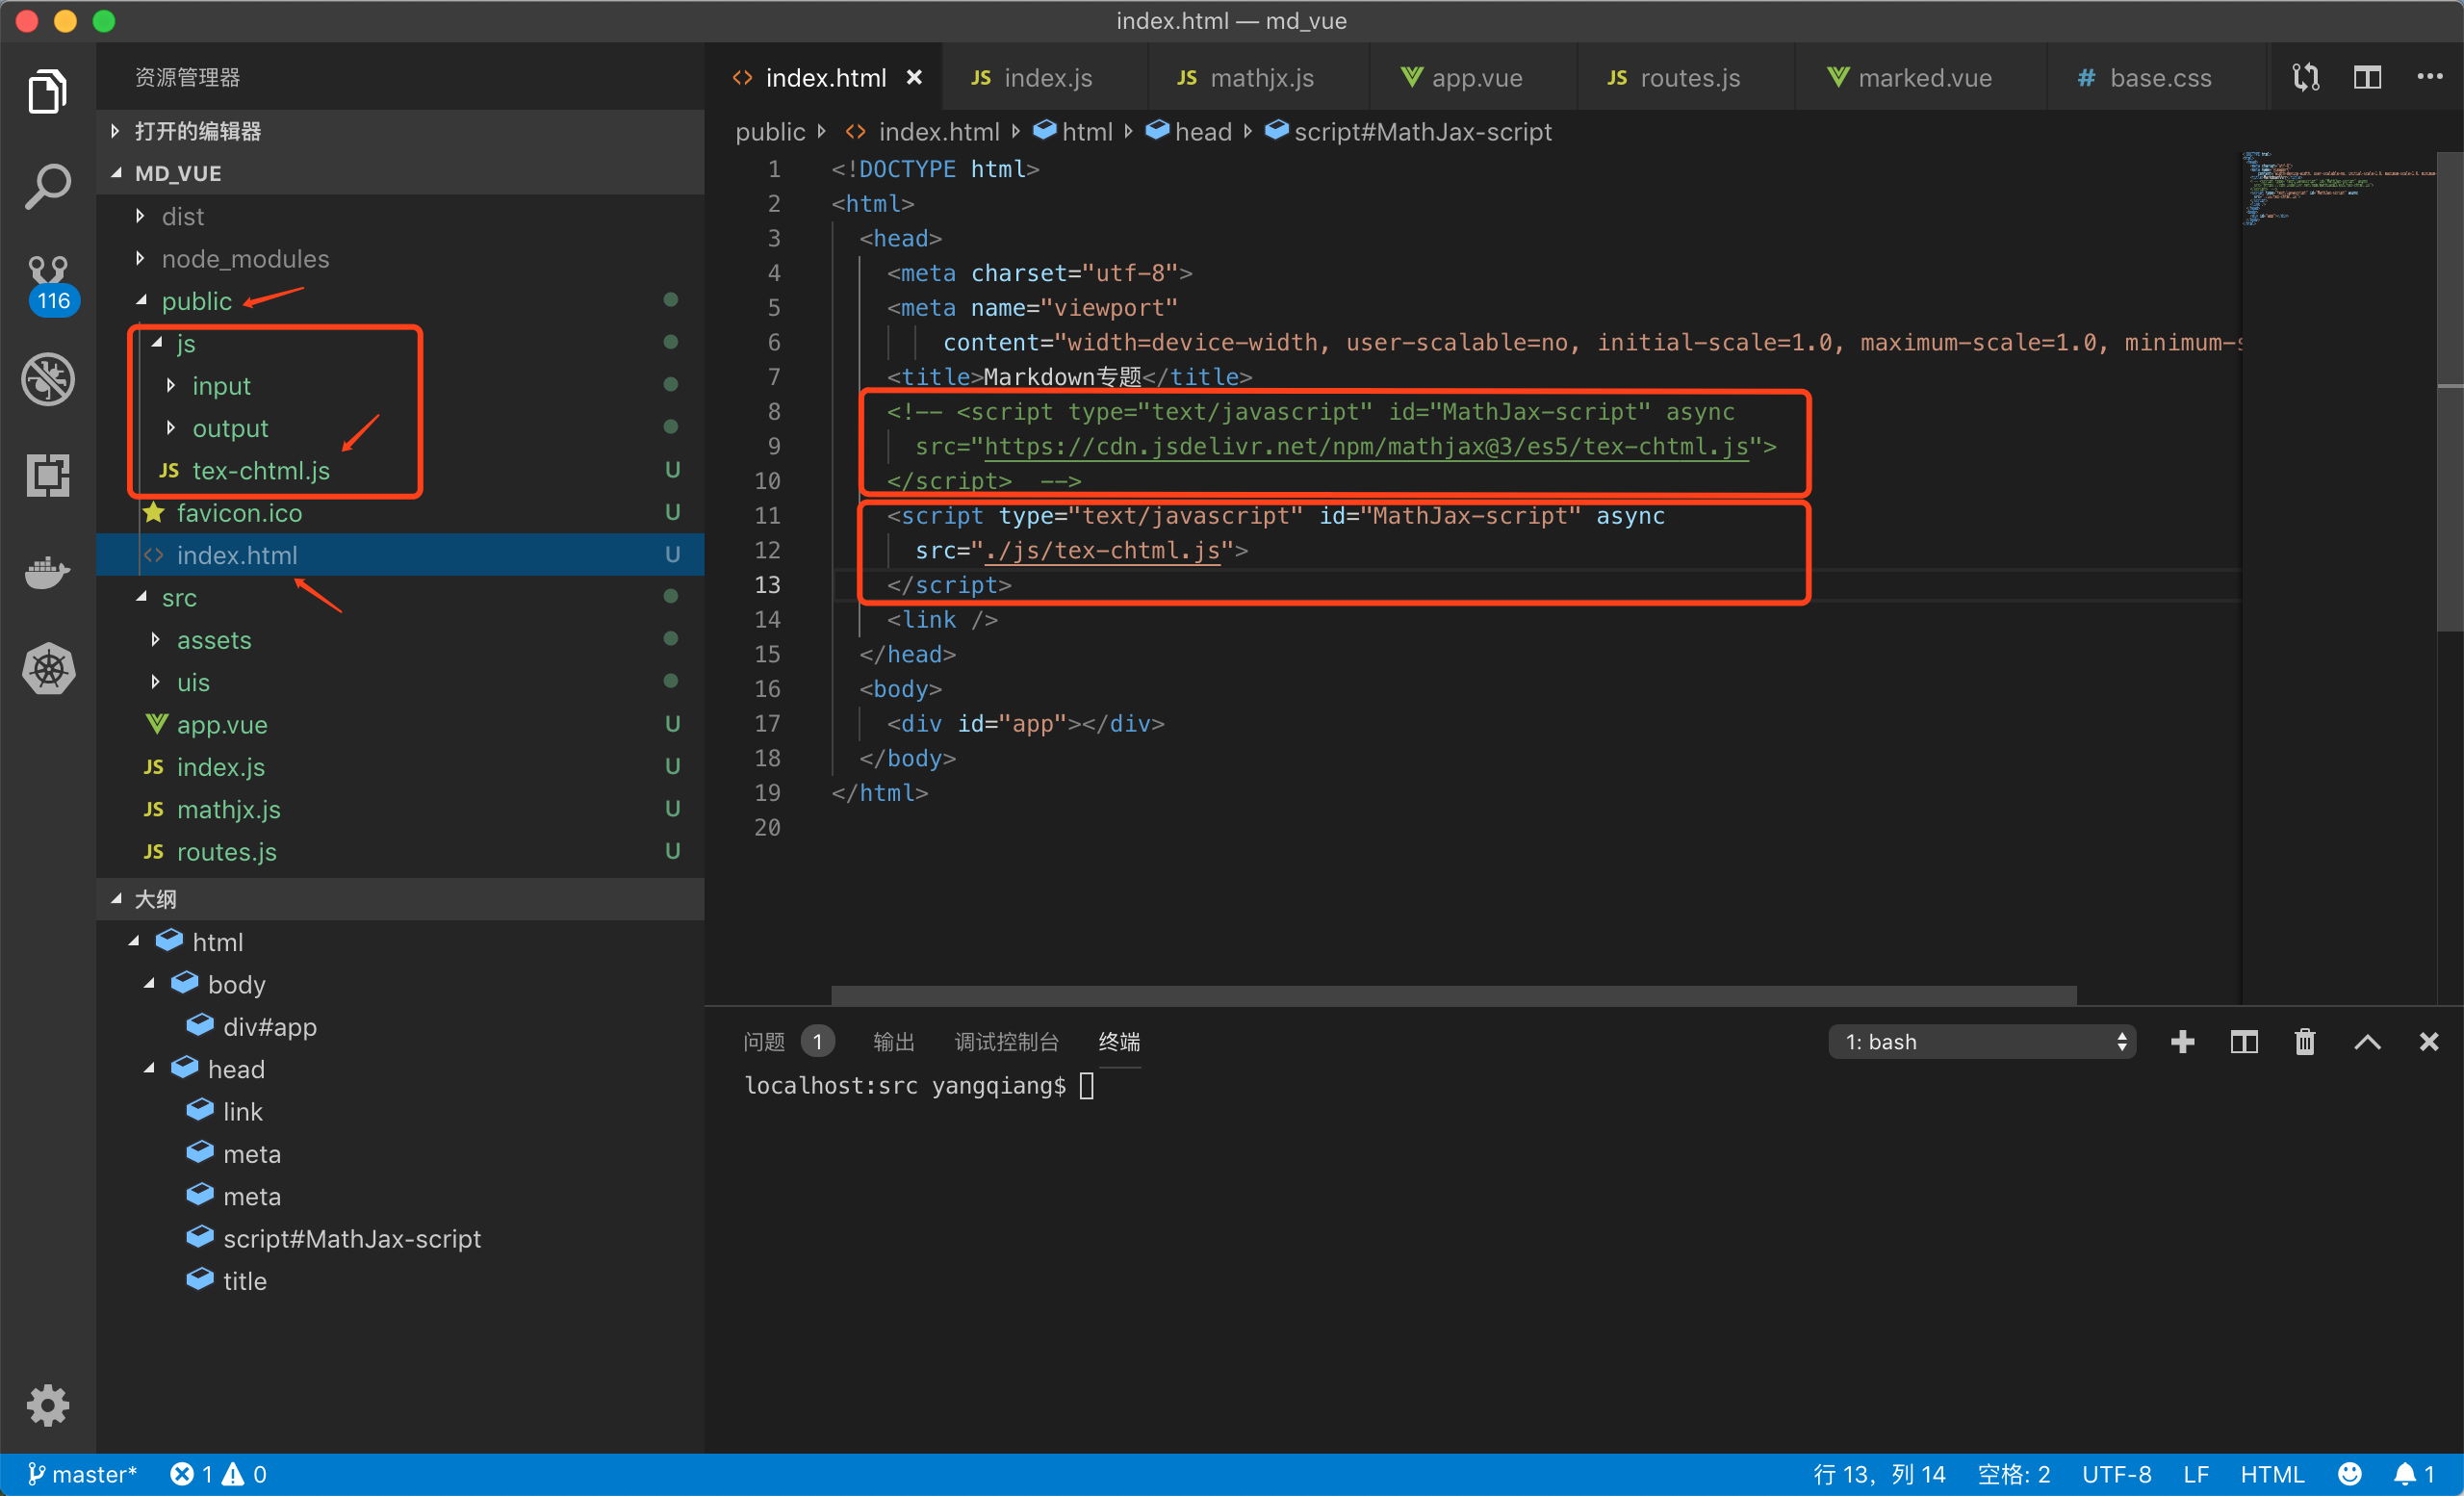

# 在Vue中处理模式

## 绑定输入源

### 定义一个属性

```javascript
export default {
    name: 'index',
    data: () => {
        return {
            ......
            latex: '数学公式测试：a^2 + b^2 = \\dfrac{c}{d}',
        };
    },
    computed: {
        
    },
};
```

### 使用v-model绑定组件

```HTML

<div class="body_mid">
            <ul>
                <li>
                    <section> 
                        <textarea v-model="latex">LaTex输入区域</textarea>
                    </section>
                </li>
                <li>
                    <div> 
                    </div>
                </li>
            </ul>
        </div>

```

## 使用计算属性

### 定义一个计算属性

```javascript
export default {
    name: 'index',
    data: () => {
        return {
            ......
            latex: '数学公式测试：a^2 + b^2 = \\dfrac{c}{d}',
        };
    },
    computed: {
        tex2html() {
            .....
            return '<h1>Hello</h1>';
        },
    },
};
```

### 使用v-html输出计算结果

```HTML
<div class="body_mid">
    <ul>
        <li>
            <section> 
                <textarea v-model="latex">LaTex输入区域</textarea>
            </section>
        </li>
        <li>
            <div v-html="tex2html"> 
            </div>
        </li>
    </ul>
</div>
```

# 转换的代码实现

- 这个代码相对比较简单。

```javascript

export default {
    name: 'index',
    data: () => {
        return {
            .....
            latex: '数学公式测试：a^2 + b^2 = \\dfrac{c}{d}',
        };
    },
    computed: {
        tex2html() {
            const options = {
                em: 19.200000762939453,
                ex: 8.533333333333333,
                containerWidth: 626.40625,
                lineWidth: 1000000, 
                scale: 1.005530377338936,
                display: false,
            };
            // var input = "a^2 + b^2 = \\dfrac{x}{y}";
            var input = this.latex;
            var html = MathJax.tex2chtml(input, options);  // 返回的是DOM对象
            return  html.outerHTML;
        },
    },
};

```

----

# 附录

## MathJax对HTML页面的自动处理

- 实际上MathJAx自动对HTML本身中特殊区域的字符做MathJax转换。
    - 一般是对`\( ... )\`符号与`$ ... $`之间的数据进行转换。

- 下面是官网提供的简单例子

```HTML

<!DOCTYPE html>
<html>
<head>
<title>MathJax TeX Test Page</title>
<script type="text/javascript" id="MathJax-script" async
  src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-chtml.js">
</script>
</head>
<body>
When \(a \ne 0\), there are two solutions to \(ax^2 + bx + c = 0\) and they are
$$x = {-b \pm \sqrt{b^2-4ac} \over 2a}.$$
</body>
</html>
```

- 效果如下：

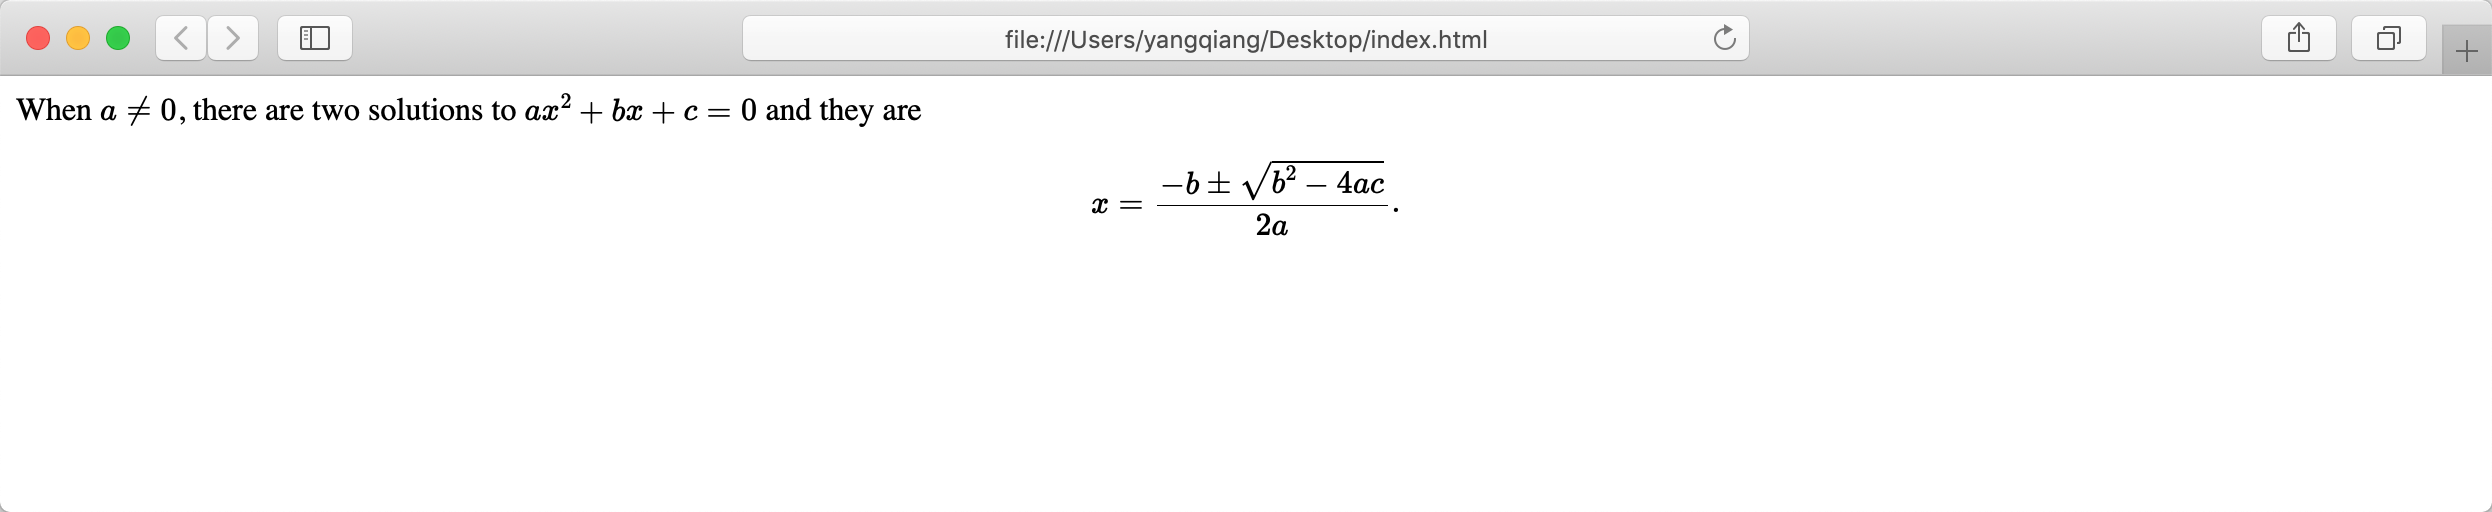

## ES6与ES5的兼容处理

- 为了各种浏览器对ES6标准实现的不同，可以引入如下js脚本解决兼容问题。

```HTML
    <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
```

## 关于webpack

- MathJax还提供了Webpack的配置使用，这里没有进一步介绍。

----